In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# FILTRAR filas (filter en R)
# Ejemplo: solo pasajeros de primera clase
primera_clase = titanic[titanic['Pclass'] == 1]

In [3]:
# También pueden usar query() para expresiones complejas
mayores_30 = titanic.query('Age > 30')

In [4]:
# SELECCIONAR columnas (select en R)
subset = titanic[['Name', 'Age', 'Survived']]



In [5]:
# ORDENAR (arrange en R)
por_edad = titanic.sort_values('Age', ascending=True)

In [6]:
# CREAR nuevas columnas (mutate en R)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [7]:
# AGRUPAR y RESUMIR (group_by + summarize en R)
por_clase = titanic.groupby('Pclass').agg({
    'Survived': 'mean',
    'Age': 'median',
    'Fare': ['mean', 'std']
})

In [8]:
# Contar frecuencias (count en R)
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
# Resumen estadístico básico
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
# Valores faltantes
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

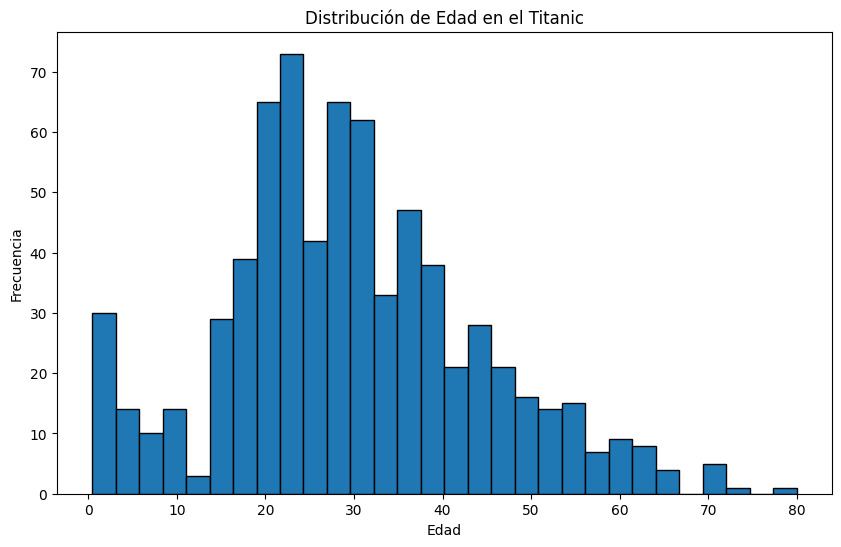

In [13]:
# Distribución de una variable continua
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en el Titanic')
plt.show()

<Axes: ylabel='Fare'>

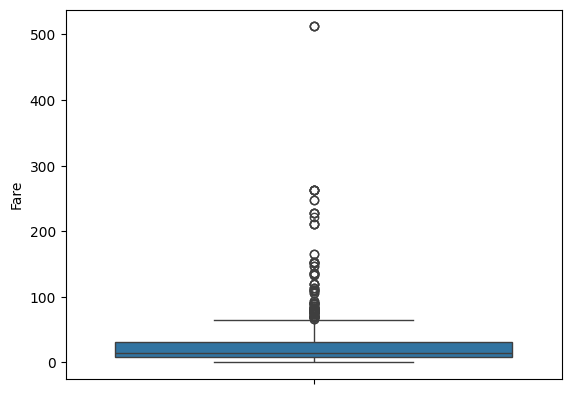

In [14]:
# Boxplot para detectar outliers
sns.boxplot(data=titanic, y='Fare')

In [15]:
# Relación entre dos variables categóricas
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


<Axes: xlabel='Age', ylabel='Fare'>

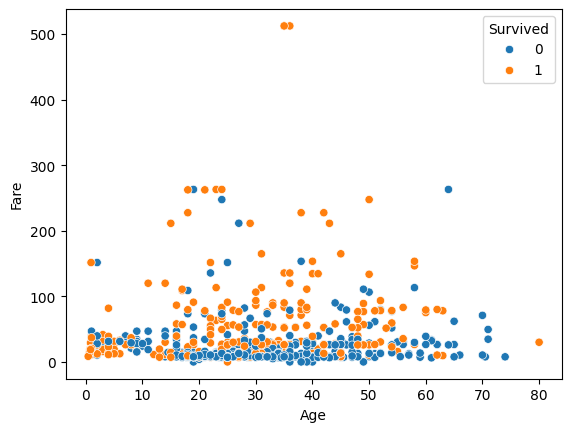

In [16]:
# Visualización de dos variables
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')

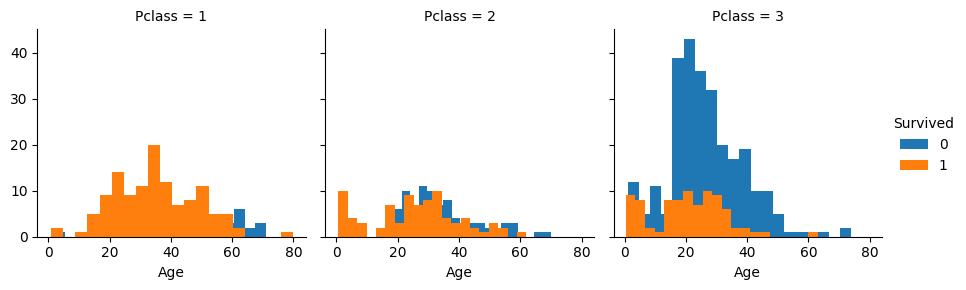

In [17]:
# Múltiples visualizaciones (facets en R)
g = sns.FacetGrid(titanic, col='Pclass', hue='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend()